In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

city_df = pd.read_csv('vancouver.csv')
print(city_df.head(3))

   Unnamed: 0             datetime  humidity  pressure  temperature  \
0           0  2012-10-01 12:00:00      76.0     807.0   284.630000   
1           1  2012-10-01 13:00:00      76.0     807.0   284.630000   
2           2  2012-10-01 14:00:00      76.0     807.0   284.629041   

  weather_description  wind_direction  wind_speed  hour  day  week  month  
0                mist             0.0         0.0    12    1    40     10  
1                mist             0.0         0.0    13    1    40     10  
2       broken clouds             6.0         0.0    14    1    40     10  


# General data summary

In [13]:
city_df.describe()

,Unnamed: 0,humidity,pressure,temperature,wind_direction,wind_speed,hour,day,week,month
count,45253.000000,44461.000000,44461.000000,44461.000000,44461.000000,44461.000000,45253.000000,45253.000000,45253.000000,45253.000000
mean,22626.000000,81.817773,1018.636580,283.862426,159.893435,2.432739,11.501337,15.725322,27.134378,6.648730
std,13063.560203,14.682216,17.607878,6.640008,98.166165,2.004617,6.922398,8.793919,15.134942,3.464906
min,0.000000,12.000000,807.000000,245.150000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,11313.000000,73.000000,1012.000000,279.160000,80.000000,1.000000,6.000000,8.000000,14.000000,4.000000
50%,22626.000000,86.000000,1017.000000,283.450000,140.000000,2.000000,12.000000,16.000000,27.000000,7.000000
75%,33939.000000,93.000000,1023.000000,288.600000,236.000000,4.000000,18.000000,23.000000,41.000000,10.000000
max,45252.000000,100.000000,1100.000000,307.000000,360.000000,25.000000,23.000000,31.000000,53.000000,12.000000


# Average values experienced each month


In [14]:
monthly_group = pd.DataFrame(city_df.groupby('month').mean())
print(monthly_group)

monthly_group.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

def perform_analysis(feature):
    """Performs monthly analysis and plotting"""
    
    mean_value = monthly_group[feature].mean()
    maximum_value = monthly_group[feature].max()
    minimum_value = monthly_group[feature].min()
    ten_percent = maximum_value/100

    print(f'Mean {feature} is: {mean_value}')
    print(f'Maximum {feature} is: {maximum_value}')
    print(f'Minimum {feature} is: {minimum_value}')
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    # To zoom into the plot
    ax.set(ylim=[minimum_value - ten_percent,
                 maximum_value + ten_percent])
         
    ax.bar((monthly_group.index), (monthly_group[feature]))
    plt.title(f'{feature} variation chart'.title())
    plt.xticks((monthly_group.index))
    plt.show()

         Unnamed: 0   humidity     pressure  temperature  wind_direction  \
month                                                                      
1      20092.300000  88.485753  1020.994624   276.585788      139.641398   
2      20864.861702  86.029846  1019.169031   277.936693      135.171690   
3      21513.100000  83.268011  1026.683602   280.154877      147.966667   
4      22245.100000  79.266944  1026.076111   282.808979      165.181667   
5      22977.100000  78.416935  1022.062634   286.871250      182.058065   
6      23709.100000  75.201389  1017.821389   289.378408      179.463889   
7      24441.100000  72.519086  1015.148925   292.126039      188.352419   
8      25185.100000  75.666129  1014.593548   292.255956      188.142742   
9      25917.100000  82.330556  1015.488611   288.427139      176.075278   
10     22327.537736  87.058297  1013.905899   283.777763      146.899472   
11     22880.327670  85.723611  1016.820278   279.384032      141.243611   
12     19348

### Humidity

Mean humidity is: 81.76193085089682
Maximum humidity is: 88.48575268817204
Minimum humidity is: 72.51908602150537


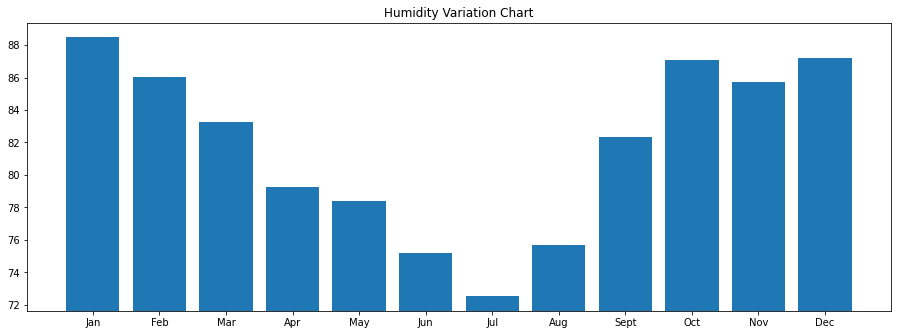

In [4]:
perform_analysis('humidity')

### Pressure

Mean pressure is: 1018.7125560845425
Maximum pressure is: 1026.6836021505376
Minimum pressure is: 1013.905898554051


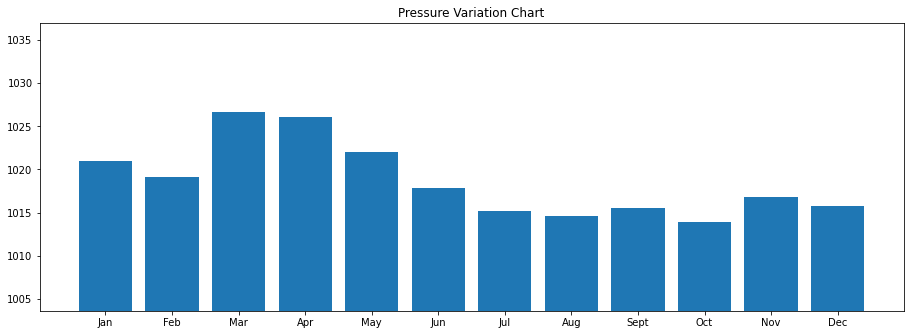

In [5]:
perform_analysis('pressure')

### Temperature

### Note the inverse correlation between temperature and humidty

Mean temperature is: 283.8312596490996
Maximum temperature is: 292.255955895921
Minimum temperature is: 276.26819218674814


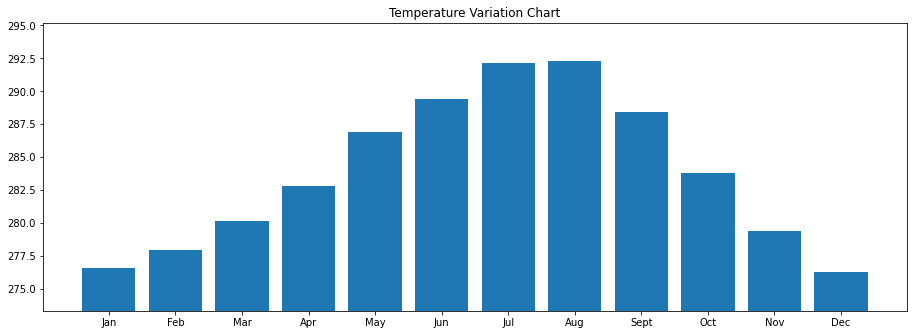

In [6]:
perform_analysis('temperature')

### Wind Direction

Mean wind_direction is: 159.95296723880105
Maximum wind_direction is: 188.3524193548387
Minimum wind_direction is: 129.23870967741937


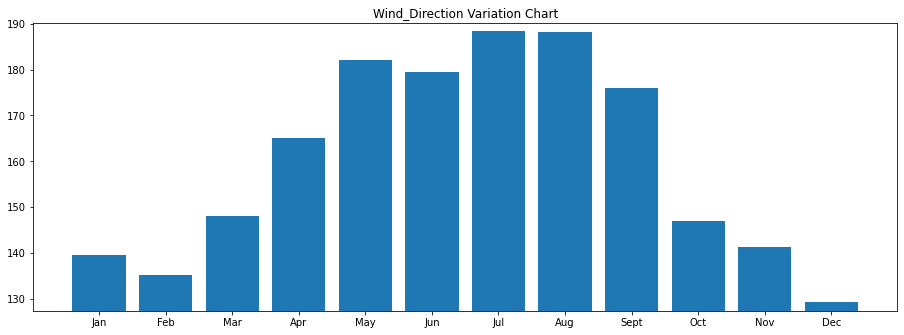

In [7]:
perform_analysis('wind_direction')

### Wind Speed

Mean wind_speed is: 2.4331984220110057
Maximum wind_speed is: 2.7544444444444443
Minimum wind_speed is: 1.9303763440860215


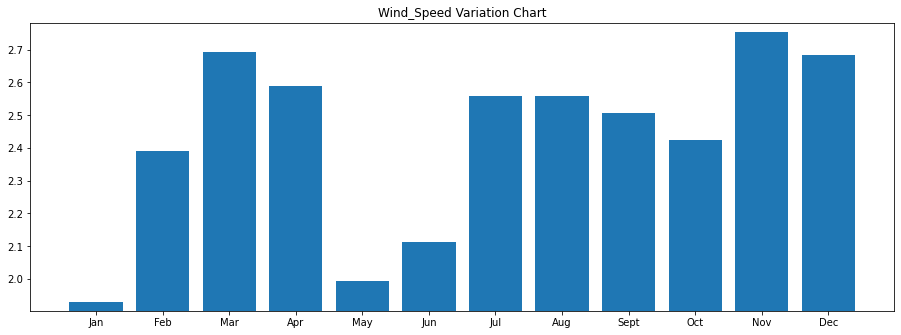

In [8]:
perform_analysis('wind_speed')

## Most experienced weather condition was a clear sky

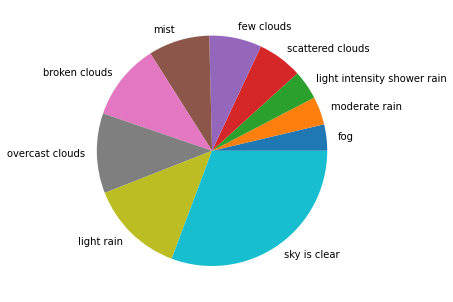

In [94]:
weather_description = city_df.groupby(['weather_description']).size()

weather_dict = {condition:count for condition, count in weather_description.iteritems()}
   

top_weathers = list(sorted(weather_dict.items(), key=lambda item: item[1]))[-10:]

top_weathers = dict(top_weathers)
#print(top_weathers)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(top_weathers.values(), labels=top_weathers.keys())
plt.show()